In [1]:
import gglasso

In [2]:
from gglasso.helper.data_generation import generate_precision_matrix, group_power_network, sample_covariance_matrix
from gglasso.problem import glasso_problem
from gglasso.helper.basic_linalg import adjacency_matrix

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

p = 20
N = 1000

Sigma, Theta = generate_precision_matrix(p=p, M=1, style='erdos', prob=0.1, nxseed=1234)

S, sample = sample_covariance_matrix(Sigma, N)

print("Shape of empirical covariance matrix: ", S.shape)
print("Shape of the sample array: ", sample.shape)

/p/software/juwelsbooster/stages/2020/software/Jupyter/2020.2.6-gcccoremkl-9.3.0-2020.2.254-Python-3.8.5/lib/python3.8/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Shape of empirical covariance matrix:  (20, 20)
Shape of the sample array:  (20, 1000)


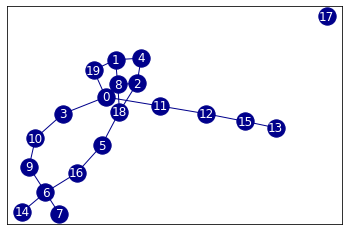

In [3]:
A = adjacency_matrix(Theta)

G = nx.from_numpy_array(A)
pos = nx.drawing.layout.spring_layout(G, seed = 1234)

plt.figure()
nx.draw_networkx(G, pos = pos, node_color = "darkblue", edge_color = "darkblue", font_color = 'white', with_labels = True)


In [4]:
P = glasso_problem(S, N, reg_params = {'lambda1': 0.05}, latent = False, do_scaling = True)
print(P)

NOTE: input data S is rescaled with the diagonal elements, this has impact on the scale of the regularization parameters!
 
SINGLE GRAPHICAL LASSO PROBLEM 
Regularization parameters:
{'lambda1': 0.05, 'mu1': None}


In [5]:
lambda1_range = np.logspace(0, -1, 30)
modelselect_params = {'lambda1_range': lambda1_range}

P.model_selection(modelselect_params = modelselect_params, method = 'eBIC', gamma = 0.25)

# regularization parameters are set to the best ones found during model selection
print(P.reg_params)


ADMM terminated after 13 iterations with status: optimal.
ADMM terminated after 10 iterations with status: optimal.
ADMM terminated after 10 iterations with status: optimal.
ADMM terminated after 26 iterations with status: optimal.
ADMM terminated after 11 iterations with status: optimal.
ADMM terminated after 26 iterations with status: optimal.
ADMM terminated after 11 iterations with status: optimal.
ADMM terminated after 10 iterations with status: optimal.
ADMM terminated after 25 iterations with status: optimal.
ADMM terminated after 10 iterations with status: optimal.
ADMM terminated after 11 iterations with status: optimal.
ADMM terminated after 10 iterations with status: optimal.
ADMM terminated after 25 iterations with status: optimal.
ADMM terminated after 9 iterations with status: optimal.
ADMM terminated after 10 iterations with status: optimal.
ADMM terminated after 9 iterations with status: optimal.
ADMM terminated after 24 iterations with status: optimal.
ADMM terminated 

Text(0.5, 1.0, 'Recovered precision matrix')

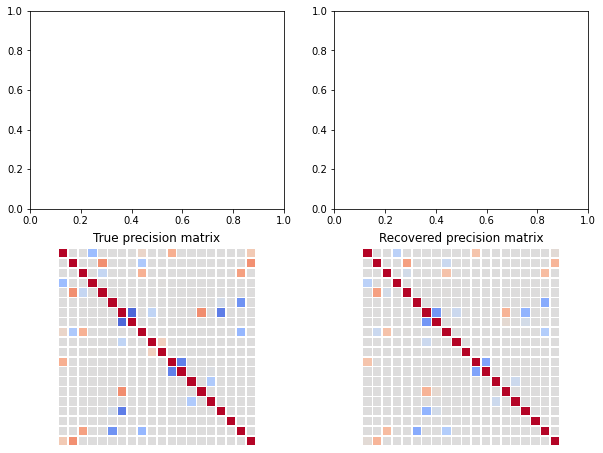

In [6]:
#tmp = P.modelselect_stats
sol = P.solution.precision_
P.solution.calc_adjacency(t = 1e-4)


fig, axs = plt.subplots(2,2, figsize=(10,8))
node_size = 100
font_size = 9


sns.heatmap(Theta, cmap = "coolwarm", vmin = -0.5, vmax = 0.5, linewidth = .5, square = True, cbar = False, \
            xticklabels = [], yticklabels = [], ax = axs[1,0])
axs[1,0].set_title("True precision matrix")

sns.heatmap(sol, cmap = "coolwarm", vmin = -0.5, vmax = 0.5, linewidth = .5, square = True, cbar = False, \
            xticklabels = [], yticklabels = [], ax = axs[1,1])
axs[1,1].set_title("Recovered precision matrix")

In [8]:
import gglasso
import numpy as np
import pandas as pd
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

from gglasso.solver.admm_solver import ADMM_MGL
from gglasso.problem import glasso_problem

from gglasso.helper.data_generation import generate_precision_matrix, group_power_network, sample_covariance_matrix
from gglasso.helper.basic_linalg import adjacency_matrix
from gglasso.helper.data_generation import time_varying_power_network, sample_covariance_matrix
from gglasso.helper.experiment_helper import lambda_grid, discovery_rate, error
from gglasso.helper.utils import get_K_identity
from gglasso.helper.experiment_helper import plot_evolution, plot_deviation, surface_plot, single_heatmap_animation
from gglasso.helper.model_selection import aic, ebic

In [ ]:
# new = []

# for i in range(0,5):
#     a = test[i,:]
#     np.fill_diagonal(a, 1)
#     new.append(a)
# new = np.array(new)

In [29]:
# np.linalg.cholesky(S)

Check if the matrix is positive semidefinitive

In [33]:
df = pd.read_csv("train.csv", sep=",")

In [37]:
age, sex  = df['age'], df['sex_f0_m1']
age.shape, sex.shape

((751,), (751,))

In [38]:
lambda1_range = np.logspace(0.5,-1.5,8)
mu1_range = np.logspace(1.5,-0.2,6)

In [39]:
mu1_range

array([31.6227766 , 14.45439771,  6.60693448,  3.01995172,  1.38038426,
        0.63095734])

In [40]:
lambda1_range

array([3.16227766, 1.63789371, 0.8483429 , 0.43939706, 0.22758459,
       0.11787686, 0.06105402, 0.03162278])